# Import de Bibliotecas

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Carga de Dados

In [2]:
url = 'https://drive.google.com/file/d/11civY-Gy1BNxHHJNKC0x0VTbasu51-Pe/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df_food = pd.read_csv(dwn_url)
print(df_food.head())

     Category  ... Data.Vitamins.Vitamin K
0      BUTTER  ...                     7.0
1      BUTTER  ...                     7.0
2  BUTTER OIL  ...                     8.6
3      CHEESE  ...                     2.4
4      CHEESE  ...                     2.5

[5 rows x 48 columns]


# CLUSTERIZAÇÃO

# Eliminação de colunas não importantes para o cálculo

In [5]:
X = df_food.drop(columns=['Category', 'Description', 'Nutrient Data Bank Number', 'Data.Household Weights.1st Household Weight', 'Data.Household Weights.1st Household Weight Description', 'Data.Household Weights.2nd Household Weight', 'Data.Household Weights.2nd Household Weight Description'], inplace=True)
X = df_food.to_numpy()
X

array([[0.00e+00, 2.11e+00, 1.58e+02, ..., 0.00e+00, 2.32e+00, 7.00e+00],
       [0.00e+00, 2.11e+00, 1.58e+02, ..., 0.00e+00, 2.32e+00, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.93e+02, ..., 0.00e+00, 2.80e+00, 8.60e+00],
       ...,
       [0.00e+00, 3.06e+00, 0.00e+00, ..., 0.00e+00, 1.50e+00, 2.00e-01],
       [0.00e+00, 1.30e+00, 0.00e+00, ..., 0.00e+00, 5.00e+00, 1.00e-01],
       [0.00e+00, 1.20e+00, 0.00e+00, ..., 0.00e+00, 5.00e-01, 1.00e-01]])

# Normalização dos dados

Tendo em vista algumas colunas possuírem valores muito maiores que outras, foi aplicada normalização para evitar que determinados atributos influenciem exageradamente nos resultados.

In [7]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X)
X_train_norm

array([[0.00000000e+00, 2.11422846e-02, 3.68375650e-03, ...,
        0.00000000e+00, 1.55287818e-02, 4.08282298e-03],
       [0.00000000e+00, 2.11422846e-02, 3.68375650e-03, ...,
        0.00000000e+00, 1.55287818e-02, 4.08282298e-03],
       [0.00000000e+00, 0.00000000e+00, 4.49977851e-03, ...,
        0.00000000e+00, 1.87416332e-02, 5.01603966e-03],
       ...,
       [0.00000000e+00, 3.06613226e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.00401606e-02, 1.16652085e-04],
       [0.00000000e+00, 1.30260521e-02, 0.00000000e+00, ...,
        0.00000000e+00, 3.34672021e-02, 5.83260426e-05],
       [0.00000000e+00, 1.20240481e-02, 0.00000000e+00, ...,
        0.00000000e+00, 3.34672021e-03, 5.83260426e-05]])

# Utilizando métrica Silhueta para definir quantidade de grupos.

In [8]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
   
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_norm)

    silhouette_avg = silhouette_score(X_train_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)   

For n_clusters = 2 The average silhouette_score is : 0.5202666009002803
For n_clusters = 3 The average silhouette_score is : 0.5382553524650985
For n_clusters = 4 The average silhouette_score is : 0.36667245149196775
For n_clusters = 5 The average silhouette_score is : 0.3708252817495911
For n_clusters = 6 The average silhouette_score is : 0.337738713084681
For n_clusters = 7 The average silhouette_score is : 0.3493901080436268
For n_clusters = 8 The average silhouette_score is : 0.34818475267068894
For n_clusters = 9 The average silhouette_score is : 0.3397311565316232
For n_clusters = 10 The average silhouette_score is : 0.3388618504763083


# Executando k-means com k = 3

In [9]:
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(X_train_norm)

# Adicionando Rótulo de Grupo à base de dados

In [10]:
df_food['Grupo'] = cluster_labels
df_food

,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Kilocalories,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Manganese,Data.Niacin,Data.Pantothenic Acid,Data.Protein,Data.Refuse Percentage,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Grupo
0,0,2.11,158,0,0.06,215,19,0.0,717,0,0,0.000,0.042,0.110,0.85,0,671,0.034,1.0,0.06,0.005,15.87,21.021,3.043,51.368,81.11,24,0.000,0.02,2,24,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0,2
1,0,2.11,158,0,0.06,219,19,0.0,717,0,0,0.004,0.042,0.110,0.85,0,671,0.034,1.0,0.06,0.005,15.87,23.426,3.012,50.489,81.11,24,0.016,0.16,2,23,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0,2
2,0,0.00,193,0,0.00,256,22,0.0,876,0,0,0.000,0.003,0.010,0.28,0,824,0.005,0.0,0.00,0.001,0.24,28.732,3.694,61.924,99.48,4,0.001,0.00,0,3,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6,2
3,0,5.11,74,0,2.34,75,15,0.0,353,0,0,0.009,1.016,1.729,21.40,0,192,0.382,14.5,0.50,0.029,42.41,7.778,0.800,18.669,28.74,528,0.040,0.31,23,387,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4,0
4,0,3.18,76,0,2.79,94,15,0.0,371,0,0,0.012,0.118,0.288,23.24,0,286,0.351,14.5,0.51,0.014,41.11,8.598,0.784,18.764,29.68,674,0.024,0.43,24,451,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,0,1.40,0,0,0.00,50,65,0.0,73,0,0,0.000,1.200,0.000,16.40,0,15,0.250,14.1,0.00,0.140,81.90,0.053,0.102,0.076,0.30,18,0.250,1.50,20,147,285,58,1.00,50,15,0.40,0.120,0.0,1.00,0.1,0
7409,0,13.40,0,0,0.00,95,95,0.0,305,0,0,0.000,3.300,0.000,18.50,0,47,0.190,73.4,0.00,0.020,43.00,8.320,6.210,7.148,25.10,66,0.100,1.40,60,254,520,4450,1.10,157,47,12.00,0.410,0.0,2.38,7.8,0
7410,0,3.06,0,0,0.00,53,81,0.0,112,0,0,0.000,1.300,0.000,23.20,0,30,0.060,27.9,0.00,0.100,73.10,0.068,0.481,0.146,1.40,115,0.300,3.00,55,338,476,265,3.00,100,30,1.30,0.100,0.0,1.50,0.2,0
7411,0,1.30,0,0,2.00,50,65,0.0,90,0,0,0.000,1.400,0.000,16.10,0,30,0.120,27.4,0.00,0.010,79.20,0.259,0.252,0.361,1.40,10,0.400,3.50,250,272,382,70,1.00,100,30,0.50,0.130,0.0,5.00,0.1,0


# ÁRVORE DE DECISÃO

# Preparando os dados para indução do modelo

In [13]:
novoX = df_food

X_dict = novoX.iloc[:,0:41].T.to_dict().values()
vect = DictVectorizer(sparse=False)
X = vect.fit_transform(X_dict)

le = LabelEncoder()
Y = le.fit_transform(novoX.iloc[:,41])

# Exibe a estrutura do dado convertido em binário.
print("\nShape do dado: {0}".format(X.shape))

print("\nLabels:", Y)

# Particiona a base de dados em 85% para treinamento e 15% para teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.15)


Shape do dado: (7413, 41)

Labels: [2 2 2 ... 0 0 0]


# Usando GridSearchCV para encontrar o melhor conjunto de parâmetros

## **Demorou um bocado de tempo para executar**

In [ ]:
tree_food = DecisionTreeClassifier(random_state=0)
params = {'criterion':('gini', 'entropy'),
          'min_samples_leaf':[1, 2, 4],
          'max_leaf_nodes':[None, 20, 40, 60],
          'max_depth':[None, 4, 5, 7],
          'min_samples_split':[2, 4, 10],
          'max_features':[None, 0.4, 0.8, 2],
          'min_impurity_decrease':[0.0, 0.0096, 0.001],
          'ccp_alpha':[0.0, 0.00754888, 0.004]}

classificadorGrid = GridSearchCV(tree_food, params)

Y_pred = classificadorGrid.fit(X,Y).predict(X_test)

print("Melhores parâmetros encontrados no conjunto de modelos testados:")
print(classificadorGrid.best_params_, "\n")

Melhores parâmetros encontrados no conjunto de modelos testados:
{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4} 



# Ajustando os melhores parâmetros e unduzindo o modelo

In [14]:
tree_food = DecisionTreeClassifier(random_state=0)
params = {'criterion':['gini'],
          'min_samples_leaf':[1],
          'max_leaf_nodes':[20],
          'max_depth':[None],
          'min_samples_split':[4],
          'max_features':[None],
          'min_impurity_decrease':[0.0],
          'ccp_alpha':[0.0]}

classificadorGrid = GridSearchCV(tree_food, params)

Y_pred = classificadorGrid.fit(X,Y).predict(X_test)

print("Acurácia (base de treinamento):", classificadorGrid.best_estimator_.score(X_train, Y_train))

print("\nAcurácia de previsão:", accuracy_score(Y_test, Y_pred), "\n")
print(classification_report(Y_test, Y_pred))

cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["data=G0", "data=G1", "data=G2"], columns=["prev=G0", "prev=G1", "prev=G2"])
print("Matriz de Confusão:\n", cnf_table, "\n")

print("\nProfundidade da Árvore:\n", classificadorGrid.best_estimator_.get_depth())
print("\nQuantidade de Folhas:\n",classificadorGrid.best_estimator_.get_n_leaves())
print("\n", "Importância dos atributos:")
list(zip(vect.feature_names_, classificadorGrid.best_estimator_.feature_importances_))

Acurácia (base de treinamento): 0.999682590065069

Acurácia de previsão: 0.9991007194244604 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00        64

    accuracy                           1.00      1112
   macro avg       1.00      1.00      1.00      1112
weighted avg       1.00      1.00      1.00      1112

Matriz de Confusão:
          prev=G0  prev=G1  prev=G2
data=G0      806        1        0
data=G1        0      241        0
data=G2        0        0       64 


Profundidade da Árvore:
 6

Quantidade de Folhas:
 20

 Importância dos atributos:


[('Data.Alpha Carotene', 0.0),
 ('Data.Ash', 0.0),
 ('Data.Beta Carotene', 0.0),
 ('Data.Beta Cryptoxanthin', 0.0),
 ('Data.Carbohydrate', 0.17718568277618582),
 ('Data.Cholesterol', 0.0),
 ('Data.Choline', 0.0),
 ('Data.Fat.Monosaturated Fat', 0.0),
 ('Data.Fat.Polysaturated Fat', 0.0006412688318338429),
 ('Data.Fat.Saturated Fat', 0.000599250828945423),
 ('Data.Fat.Total Lipid', 0.007012449941922),
 ('Data.Fiber', 0.0),
 ('Data.Kilocalories', 0.04244682666550411),
 ('Data.Lutein and Zeaxanthin', 0.0),
 ('Data.Lycopene', 0.0),
 ('Data.Major Minerals.Calcium', 0.0015409307030025156),
 ('Data.Major Minerals.Copper', 0.0),
 ('Data.Major Minerals.Iron', 0.0),
 ('Data.Major Minerals.Magnesium', 0.0),
 ('Data.Major Minerals.Phosphorus', 0.0),
 ('Data.Major Minerals.Potassium', 0.0),
 ('Data.Major Minerals.Sodium', 0.0),
 ('Data.Major Minerals.Zinc', 0.0),
 ('Data.Manganese', 0.0),
 ('Data.Niacin', 0.0),
 ('Data.Pantothenic Acid', 0.0009172206565491167),
 ('Data.Protein', 0.00122146945969711

# Visualizando a Árvore Gerada

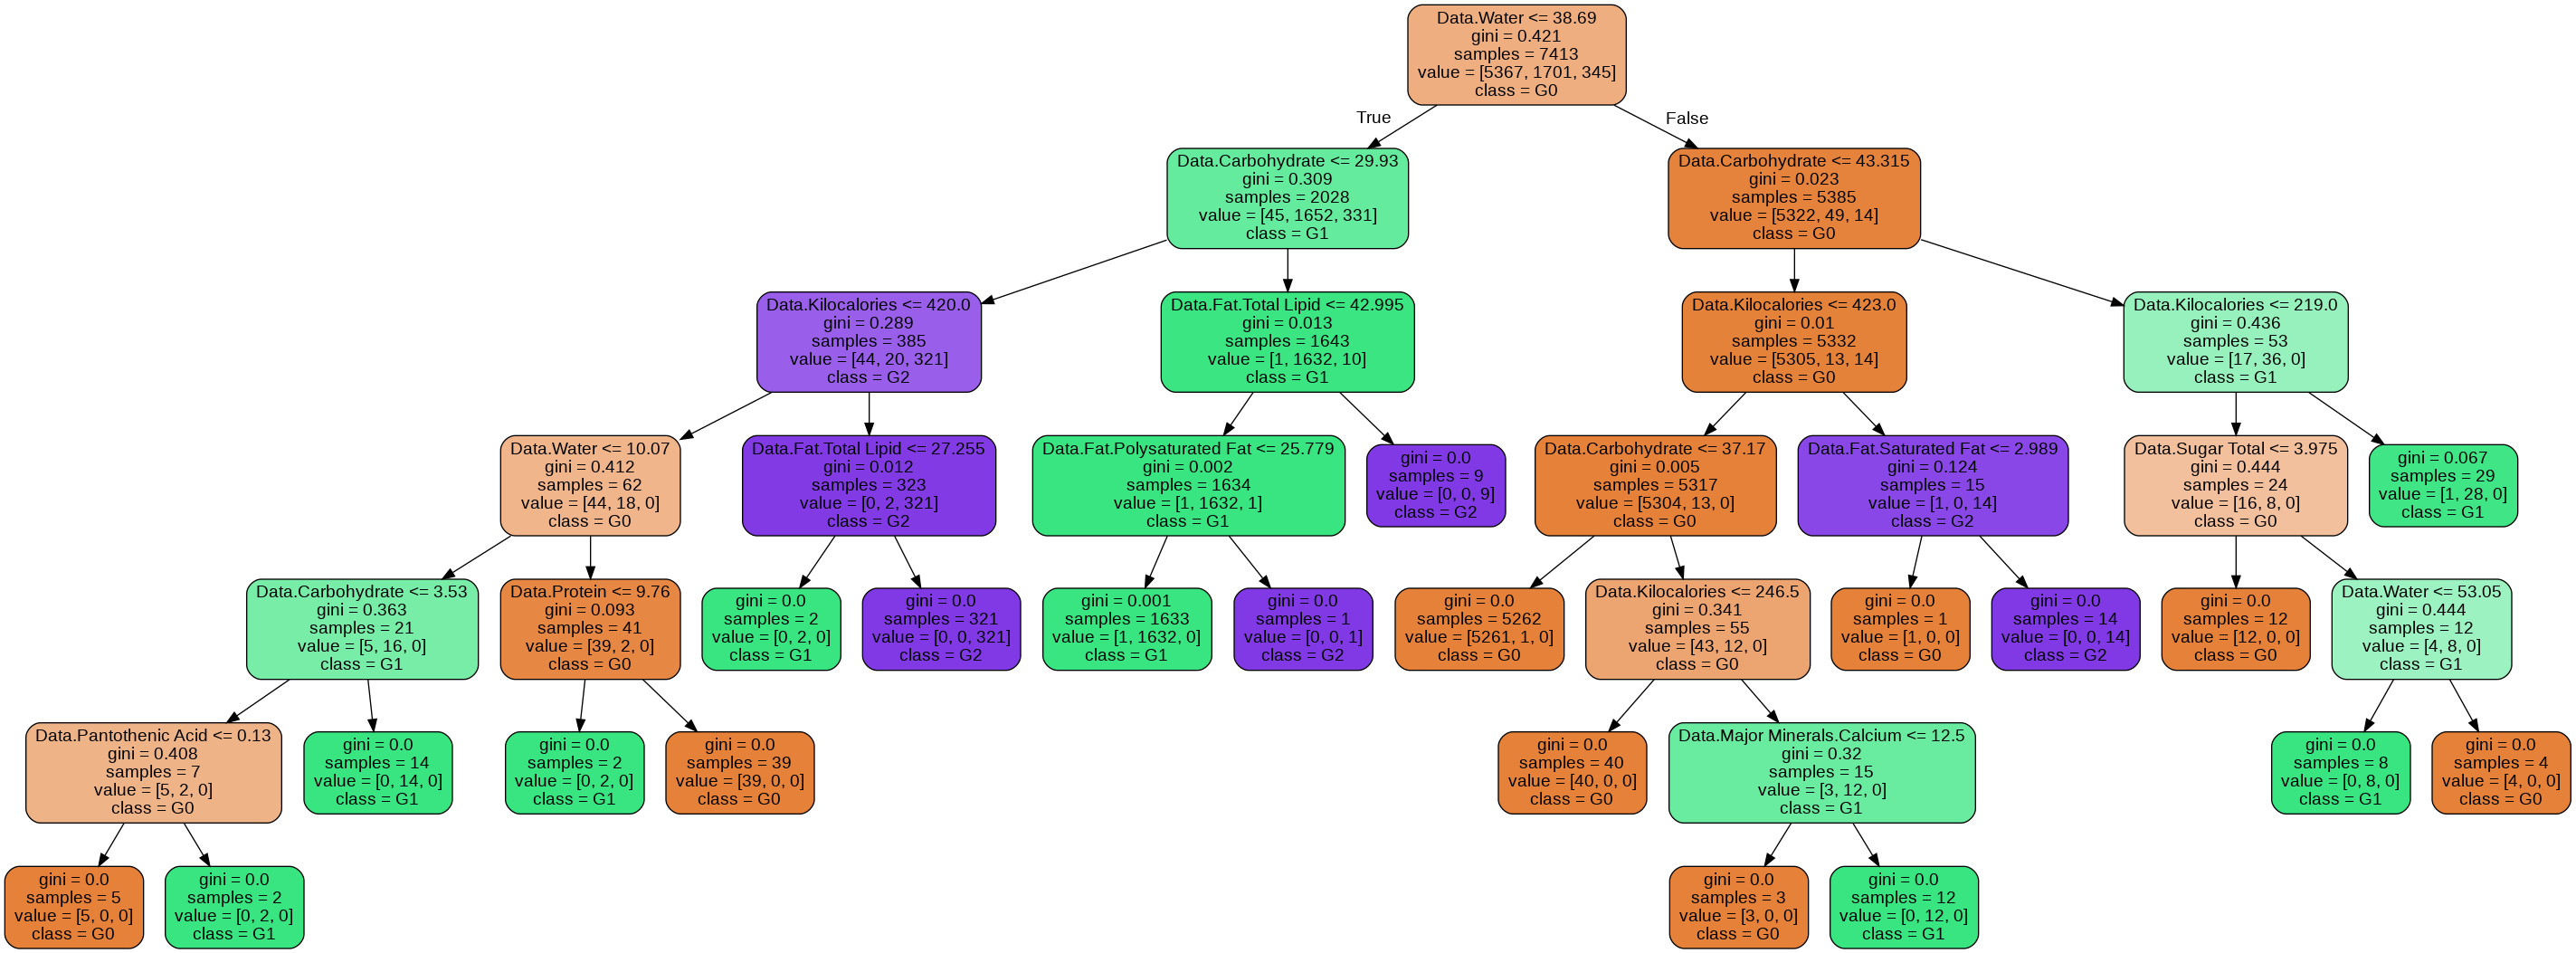

In [15]:
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(classificadorGrid.best_estimator_, out_file=None, 
                                feature_names=vect.feature_names_,  
                                rounded =True,
                                filled=True,
                                class_names=['G0', 'G1', 'G2'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())